## 20B030218 Zhetessov Nur

# Palmer Archipelago (Antarctica) penguin data

![](https://repository-images.githubusercontent.com/269674245/19ff8480-ab54-11ea-8932-1de30d253dad)

![](https://pbs.twimg.com/media/Ed8VkiyU4AAVCwq.png)

## Attributes

Simplified data from original penguin data sets. Contains variables:

- **species**:            penguin species (Chinstrap, Adélie, or Gentoo)
- **culmen_length_mm**:   culmen length (mm)
- **culmen_depth_mm**:    culmen depth (mm)
- **flipper_length_mm**:  flipper length (mm)
- **body_mass_g**:        body mass (g)
- **island**:             island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- **sex**:                penguin sex

## Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Data cleaning

<AxesSubplot:>

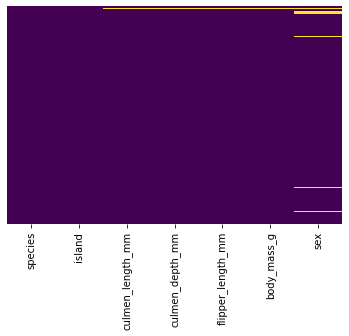

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
def impute_null(cols):
    a = df[["species", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]].groupby('species').mean().reset_index()
    spec = cols[0]
    col = cols[1]
    
    if pd.isnull(col):
        return a[a["species"] == spec][cols.index[1]].values[0]
    else:
        return col

In [10]:
df["culmen_length_mm"] = df[["species", "culmen_length_mm"]].apply(impute_null, axis = 1)
df["culmen_depth_mm"] = df[["species", "culmen_depth_mm"]].apply(impute_null, axis = 1)
df["flipper_length_mm"] = df[["species", "flipper_length_mm"]].apply(impute_null, axis = 1)
df["body_mass_g"] = df[["species", "body_mass_g"]].apply(impute_null, axis = 1)

In [11]:
df["sex"].replace(np.nan, "MALE", inplace=True)

In [12]:
df[(df["sex"]!="MALE") & (df["sex"]!="FEMALE")]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df["sex"].replace(".", "MALE", inplace=True)

In [14]:
df[(df["sex"]!="MALE") & (df["sex"]!="FEMALE")]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [15]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Visualisation

### Categorical Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [18]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

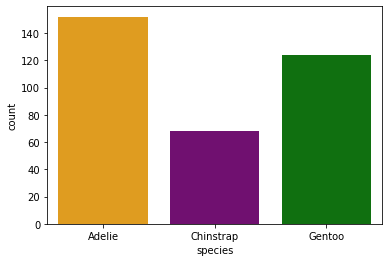

In [19]:
sns.countplot(x = 'species', data = df, palette=("Orange", "Purple", "Green"))
plt.show()

In [20]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

<AxesSubplot:xlabel='island', ylabel='count'>

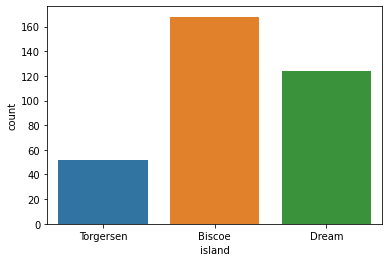

In [21]:
sns.countplot(x = "island", data = df)

<AxesSubplot:xlabel='island'>

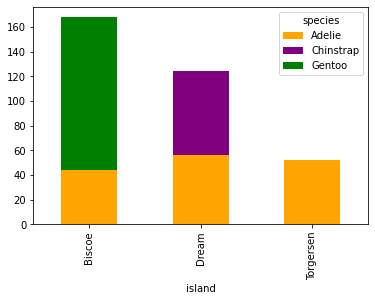

In [22]:
pd.pivot_table(df, index ='island', columns='species', values = "body_mass_g", aggfunc="count").plot(kind="bar", stacked = True, color=("Orange", "Purple", "Green"))

<AxesSubplot:xlabel='island', ylabel='count'>

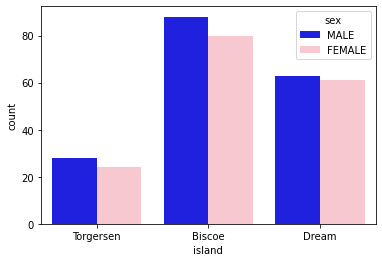

In [23]:
sns.countplot(x = "island", data = df, hue = 'sex', palette=("Blue","Pink"))

<AxesSubplot:xlabel='species', ylabel='count'>

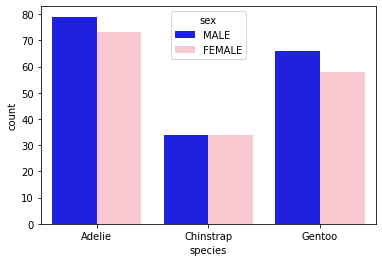

In [24]:
sns.countplot(x = "species", data = df, hue = 'sex', palette=("Blue","Pink"))

### Numeric Data

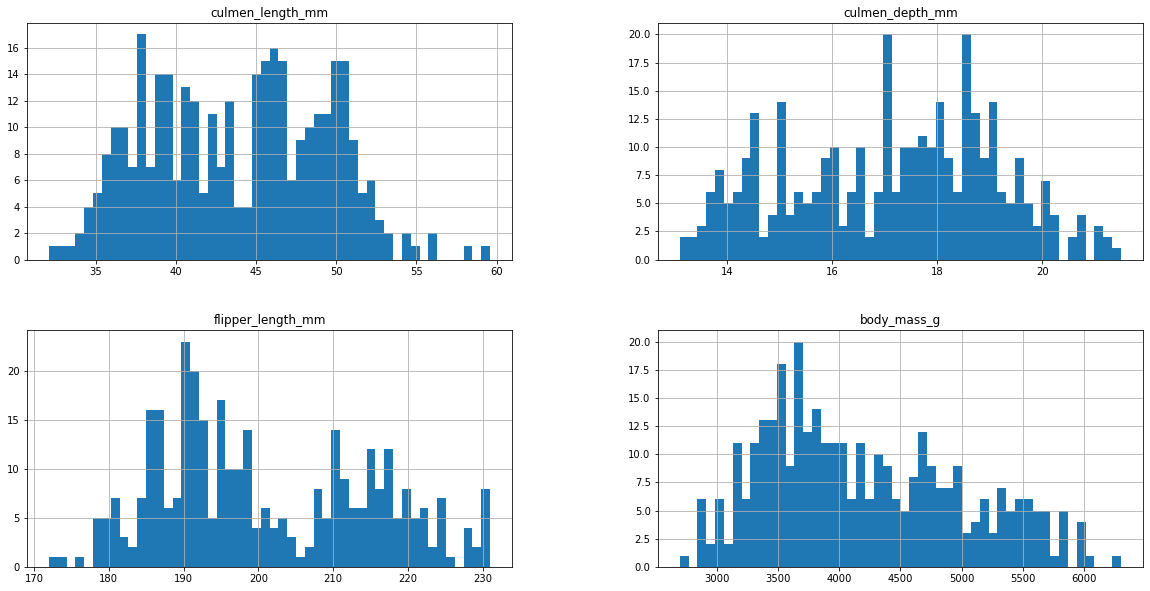

In [25]:
df.hist(bins = 50, figsize=(20,10))
plt.show()

In [26]:
df["culmen_length_mm"].iplot(kind="hist", bins = 100, color = "blue")

In [27]:
df["culmen_depth_mm"].iplot(kind="hist", bins = 100, color = "blue")

In [28]:
df["flipper_length_mm"].iplot(kind="hist", bins = 100, color = "blue")

In [29]:
df["body_mass_g"].iplot(kind="hist", bins = 100, color = "blue")

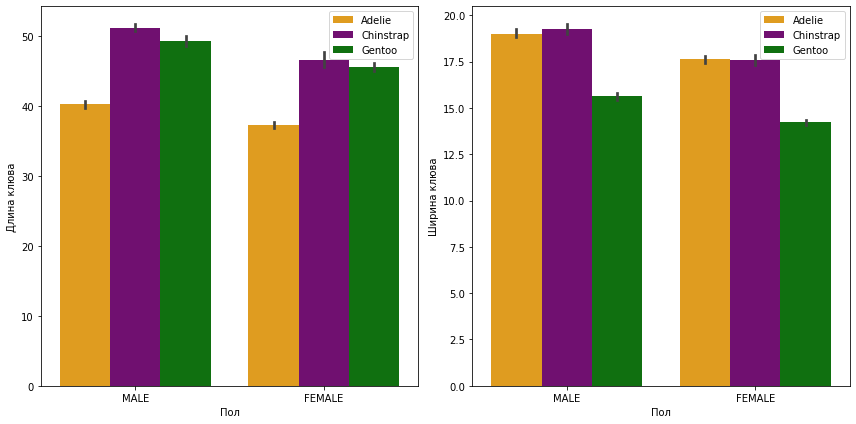

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(ax=axes[0], x="sex", y="culmen_length_mm", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[0].set_ylabel("Длина клюва")
axes[0].set_xlabel("Пол")
axes[0].legend(loc="upper right")

sns.barplot(ax=axes[1], x="sex", y="culmen_depth_mm", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[1].set_ylabel("Ширина клюва")
axes[1].set_xlabel("Пол")
axes[1].legend(loc="upper right")

fig.tight_layout()
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')

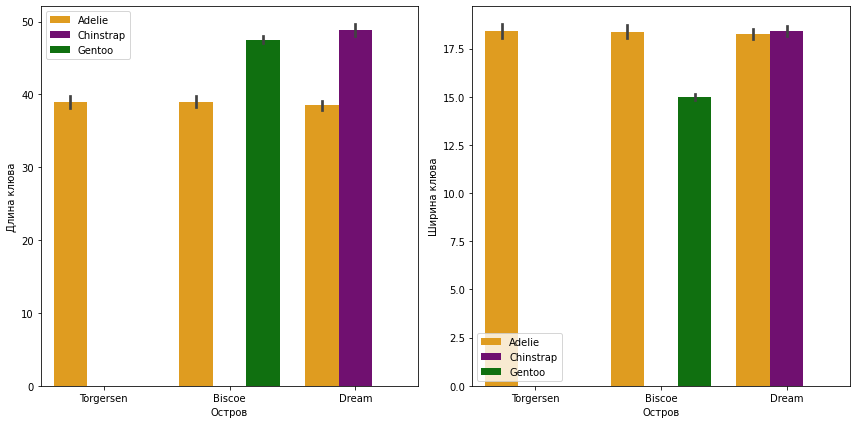

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(ax=axes[0], x="island", y="culmen_length_mm", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[0].set_ylabel("Длина клюва")
axes[0].set_xlabel("Остров")
axes[0].legend(loc="upper left")

sns.barplot(ax=axes[1], x="island", y="culmen_depth_mm", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[1].set_ylabel("Ширина клюва")
axes[1].set_xlabel("Остров")
axes[1].legend(loc="lower left")

fig.tight_layout()
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')

<Figure size 504x360 with 0 Axes>

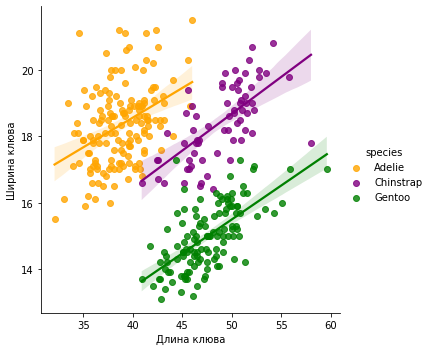

In [32]:
plt.figure(figsize=(7,5))
sns.lmplot(data=df, x = "culmen_length_mm", y="culmen_depth_mm", hue='species', palette=('Orange', 'Purple', 'Green'))
plt.ylabel("Ширина клюва")
plt.xlabel("Длина клюва")
plt.show()

<Figure size 864x576 with 0 Axes>

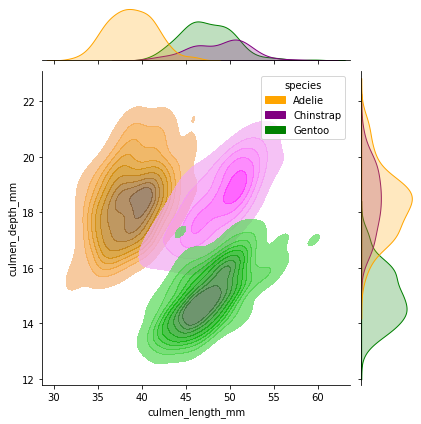

In [33]:
plt.figure(figsize=(12, 8))
sns.jointplot(data=df, x = "culmen_length_mm", y="culmen_depth_mm", hue='species', palette=('Orange', 'Purple', 'Green'), kind='kde', fill=True, alpha=0.7)
plt.ylabel("Ширина клюва")
plt.xlabel("Длина клюва")
plt.show()

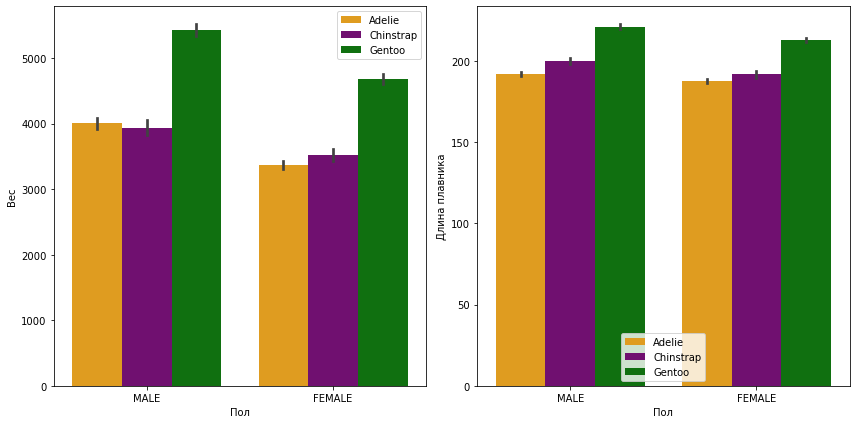

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(ax=axes[0], x="sex", y="body_mass_g", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[0].set_ylabel("Вес")
axes[0].set_xlabel("Пол")
axes[0].legend(loc="upper right")

sns.barplot(ax=axes[1], x="sex", y="flipper_length_mm", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[1].set_ylabel("Длина плавника")
axes[1].set_xlabel("Пол")
axes[1].legend(loc="lower center")

fig.tight_layout()

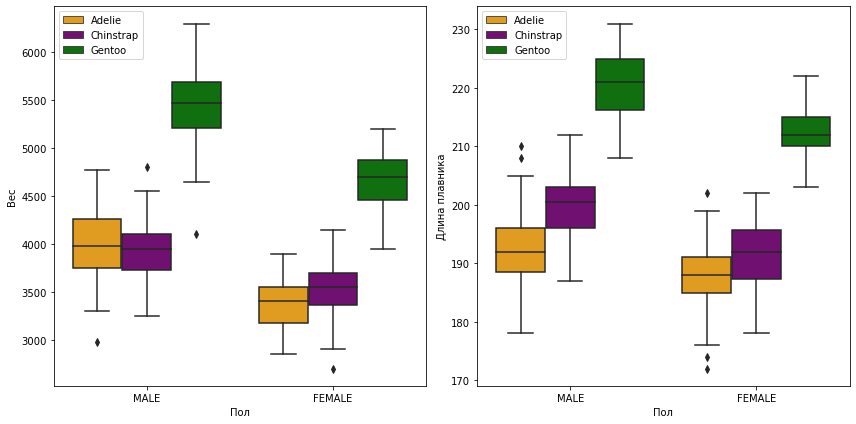

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=axes[0], data=df, x = "sex", y = "body_mass_g", hue = "species", palette=('Orange', 'Purple', 'Green'))
axes[0].set_ylabel("Вес")
axes[0].set_xlabel("Пол")
axes[0].legend(loc="upper left")

sns.boxplot(ax=axes[1], x="sex", y="flipper_length_mm", hue="species", data=df, palette=('Orange', 'Purple', 'Green'))
axes[1].set_ylabel("Длина плавника")
axes[1].set_xlabel("Пол")
axes[1].legend(loc="upper left")

fig.tight_layout()

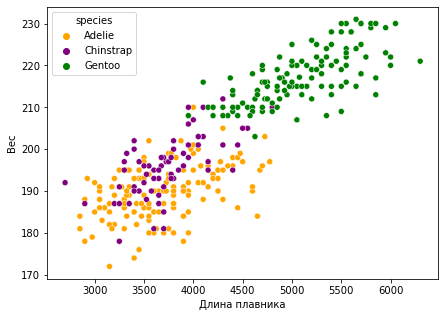

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x = "body_mass_g", y="flipper_length_mm", hue='species', palette=('Orange', 'Purple', 'Green'))
plt.ylabel("Вес")
plt.xlabel("Длина плавника")
plt.show()

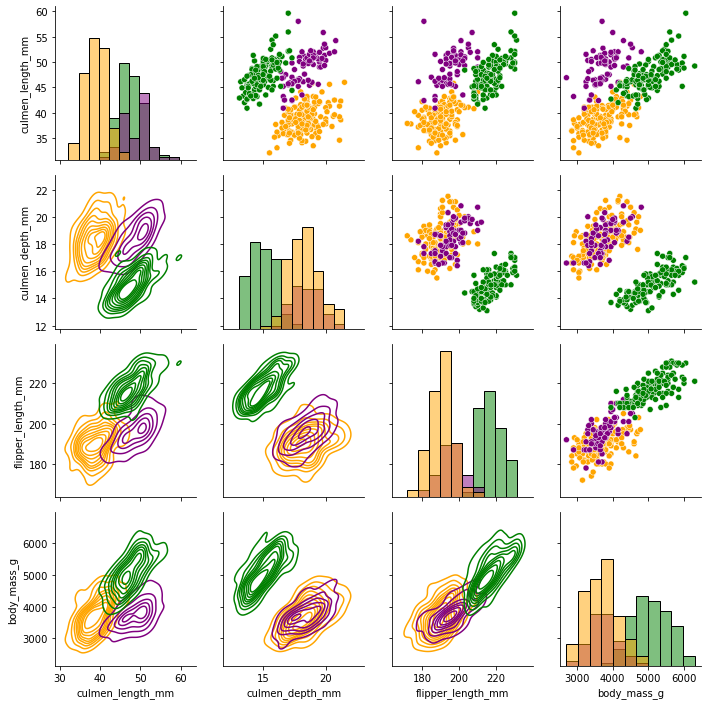

In [37]:
g = sns.PairGrid(df, hue='species', palette=('Orange', 'Purple', 'Green'))
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

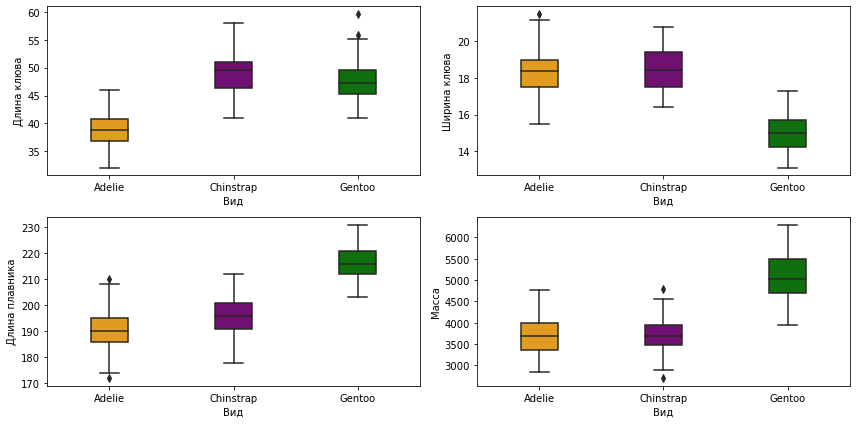

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot(ax=axes[0, 0], x = df["species"], y = df["culmen_length_mm"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[0, 0].set_ylabel("Длина клюва")
axes[0, 0].set_xlabel("Вид")
#axes[0, 0].legend(loc="upper left")

sns.boxplot(ax=axes[0, 1], x = df["species"], y = df["culmen_depth_mm"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[0, 1].set_ylabel("Ширина клюва")
axes[0, 1].set_xlabel("Вид")
#axes[0, 1].legend(loc="upper left")

sns.boxplot(ax=axes[1, 0], x = df["species"], y = df["flipper_length_mm"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[1, 0].set_ylabel("Длина плавника")
axes[1, 0].set_xlabel("Вид")
#axes[1, 0].legend(loc="upper left")

sns.boxplot(ax=axes[1, 1], x = df["species"], y = df["body_mass_g"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[1, 1].set_ylabel("Масса")
axes[1, 1].set_xlabel("Вид")
#axes[1, 1].legend(loc="upper left")

fig.tight_layout()

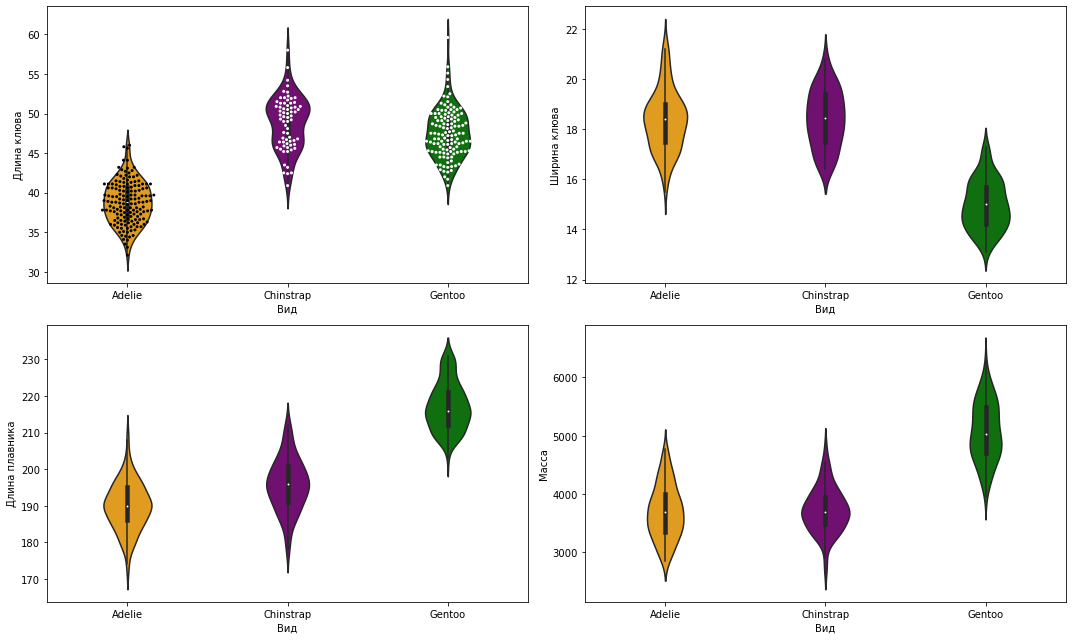

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

sns.violinplot(ax=axes[0, 0], x = df["species"], y = df["culmen_length_mm"], width=0.3, palette=('Orange', 'Purple', 'Green'))
sns.swarmplot(ax=axes[0, 0], x = df["species"], y = df["culmen_length_mm"], palette=("Black", "White", "White"), size=3)
axes[0, 0].set_ylabel("Длина клюва")
axes[0, 0].set_xlabel("Вид")
#axes[0, 0].legend(loc="upper left")

sns.violinplot(ax=axes[0, 1], x = df["species"], y = df["culmen_depth_mm"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[0, 1].set_ylabel("Ширина клюва")
axes[0, 1].set_xlabel("Вид")
#axes[0, 1].legend(loc="upper left")

sns.violinplot(ax=axes[1, 0], x = df["species"], y = df["flipper_length_mm"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[1, 0].set_ylabel("Длина плавника")
axes[1, 0].set_xlabel("Вид")
#axes[1, 0].legend(loc="upper left")

sns.violinplot(ax=axes[1, 1], x = df["species"], y = df["body_mass_g"], width=0.3, palette=('Orange', 'Purple', 'Green'))
axes[1, 1].set_ylabel("Масса")
axes[1, 1].set_xlabel("Вид")
#axes[1, 1].legend(loc="upper left")

fig.tight_layout()

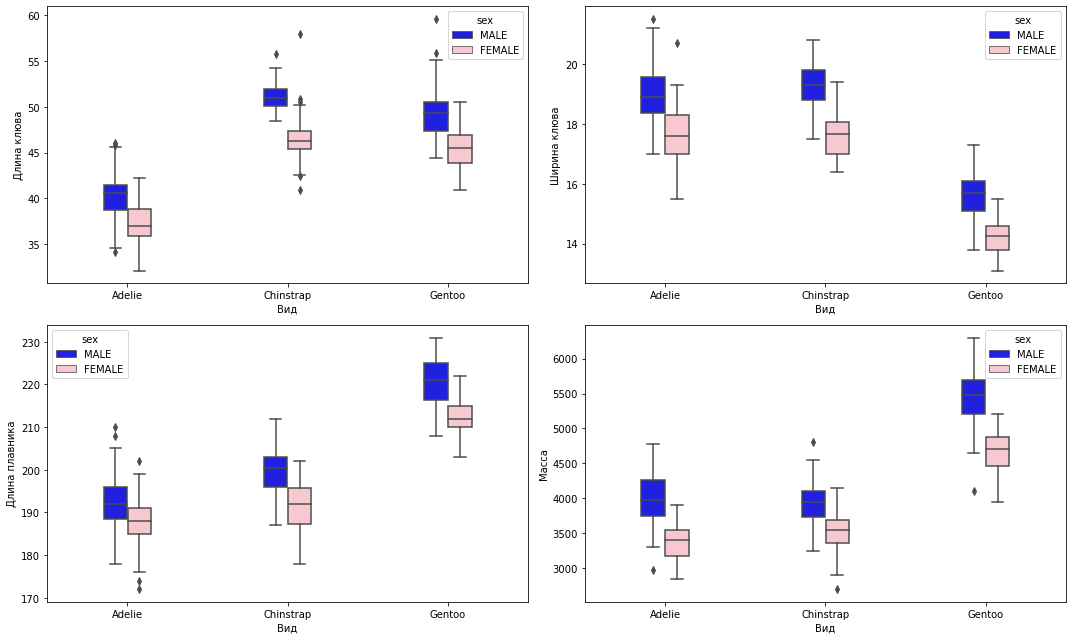

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

sns.boxplot(ax=axes[0, 0], x = df["species"], y = df["culmen_length_mm"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"))
axes[0, 0].set_ylabel("Длина клюва")
axes[0, 0].set_xlabel("Вид")
#axes[0, 0].legend(loc="upper left")

sns.boxplot(ax=axes[0, 1], x = df["species"], y = df["culmen_depth_mm"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"))
axes[0, 1].set_ylabel("Ширина клюва")
axes[0, 1].set_xlabel("Вид")
#axes[0, 1].legend(loc="upper left")

sns.boxplot(ax=axes[1, 0], x = df["species"], y = df["flipper_length_mm"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"))
axes[1, 0].set_ylabel("Длина плавника")
axes[1, 0].set_xlabel("Вид")
#axes[1, 0].legend(loc="upper left")

sns.boxplot(ax=axes[1, 1], x = df["species"], y = df["body_mass_g"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"))
axes[1, 1].set_ylabel("Масса")
axes[1, 1].set_xlabel("Вид")
#axes[1, 1].legend(loc="upper left")

fig.tight_layout()

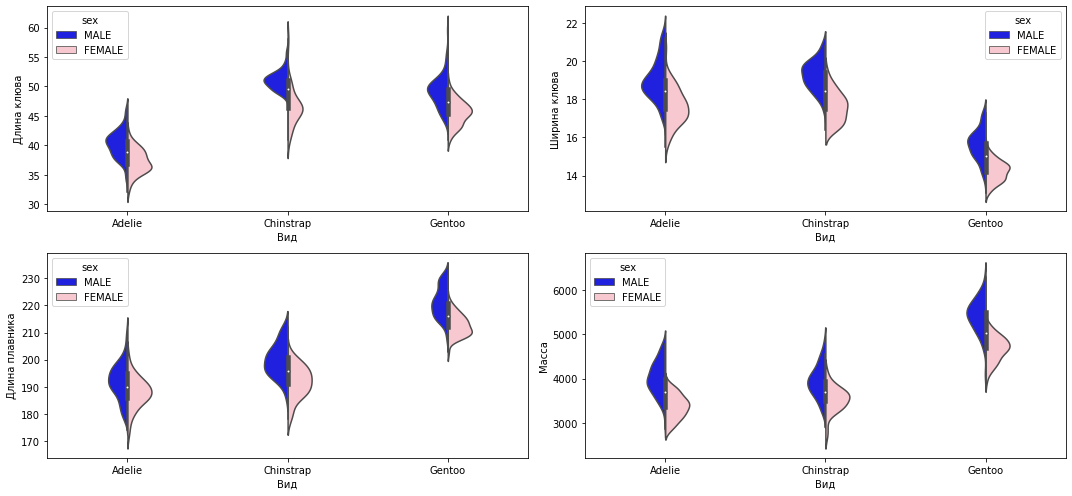

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

sns.violinplot(ax=axes[0, 0], x = df["species"], y = df["culmen_length_mm"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"), split=True)
axes[0, 0].set_ylabel("Длина клюва")
axes[0, 0].set_xlabel("Вид")
#axes[0, 0].legend(loc="upper left")

sns.violinplot(ax=axes[0, 1], x = df["species"], y = df["culmen_depth_mm"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"), split=True)
axes[0, 1].set_ylabel("Ширина клюва")
axes[0, 1].set_xlabel("Вид")
#axes[0, 1].legend(loc="upper left")

sns.violinplot(ax=axes[1, 0], x = df["species"], y = df["flipper_length_mm"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"),split=True)
axes[1, 0].set_ylabel("Длина плавника")
axes[1, 0].set_xlabel("Вид")
#axes[1, 0].legend(loc="upper left")

sns.violinplot(ax=axes[1, 1], x = df["species"], y = df["body_mass_g"], hue=df['sex'], width=0.3, palette=("Blue", "Pink"),split=True)
axes[1, 1].set_ylabel("Масса")
axes[1, 1].set_xlabel("Вид")
#axes[1, 1].legend(loc="upper left")

fig.tight_layout()

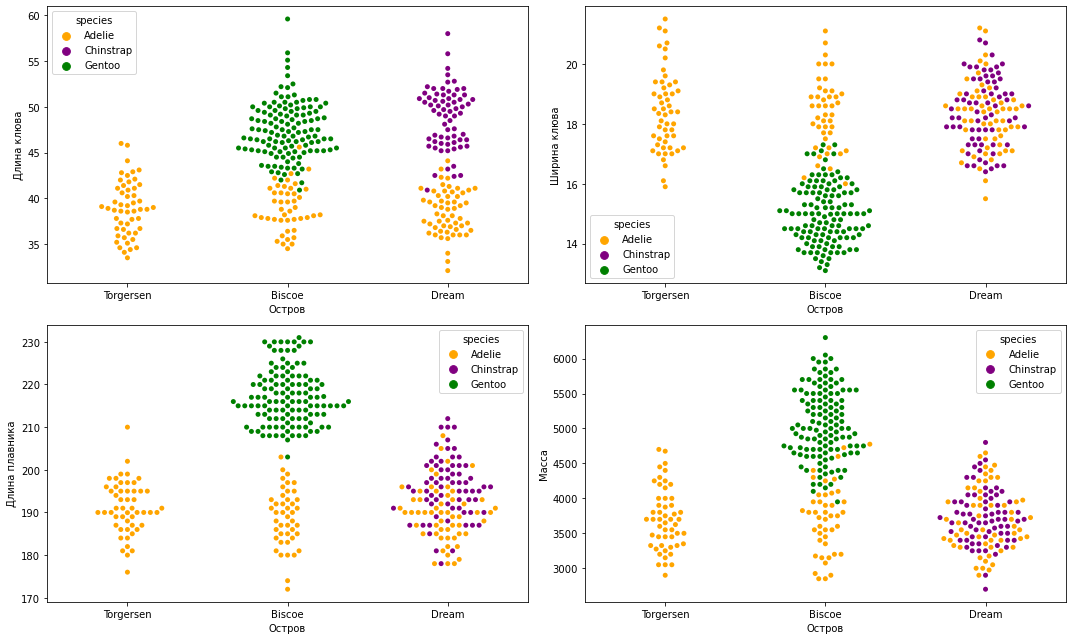

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

sns.swarmplot(ax=axes[0, 0], x = df["island"], y = df["culmen_length_mm"], hue=df['species'], palette=('Orange', 'Purple', 'Green'))
axes[0, 0].set_ylabel("Длина клюва")
axes[0, 0].set_xlabel("Остров")
#axes[0, 0].legend(loc="upper left")

sns.swarmplot(ax=axes[0, 1], x = df["island"], y = df["culmen_depth_mm"], hue=df['species'], palette=('Orange', 'Purple', 'Green'))
axes[0, 1].set_ylabel("Ширина клюва")
axes[0, 1].set_xlabel("Остров")
#axes[0, 1].legend(loc="upper left")

sns.swarmplot(ax=axes[1, 0], x = df["island"], y = df["flipper_length_mm"], hue=df['species'], palette=('Orange', 'Purple', 'Green'))
axes[1, 0].set_ylabel("Длина плавника")
axes[1, 0].set_xlabel("Остров")
#axes[1, 0].legend(loc="upper left")

sns.swarmplot(ax=axes[1, 1], x = df["island"], y = df["body_mass_g"], hue=df['species'], palette=('Orange', 'Purple', 'Green'))
axes[1, 1].set_ylabel("Масса")
axes[1, 1].set_xlabel("Остров")
#axes[1, 1].legend(loc="upper left")

fig.tight_layout()

## Converting Categorical Features

In [43]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [44]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [45]:
dummies = pd.get_dummies(df[['island','sex']],drop_first=True) 

### Target Column Coding

In [46]:
df['species'] = pd.factorize(df['species'])[0]#df['species']=df['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

In [59]:
pd.concat([df.drop(["island", "sex"], axis = 1), dummies], axis = 1)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,0,39.100000,18.700000,181.000000,3750.000000,0,1,1
1,0,39.500000,17.400000,186.000000,3800.000000,0,1,0
2,0,40.300000,18.000000,195.000000,3250.000000,0,1,0
3,0,38.791391,18.346358,189.953642,3700.662252,0,1,1
4,0,36.700000,19.300000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...,...
339,2,47.504878,14.982114,217.186992,5076.016260,0,0,1
340,2,46.800000,14.300000,215.000000,4850.000000,0,0,0
341,2,50.400000,15.700000,222.000000,5750.000000,0,0,1
342,2,45.200000,14.800000,212.000000,5200.000000,0,0,0


# Model Building

In [229]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Train Test Splitting and Models Accuracies

In [49]:
df_preprocessed = pd.concat([df.drop(['island','sex'], axis=1), dummies], axis = 1)
target = df_preprocessed.species
df_preprocessed

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,0,39.100000,18.700000,181.000000,3750.000000,0,1,1
1,0,39.500000,17.400000,186.000000,3800.000000,0,1,0
2,0,40.300000,18.000000,195.000000,3250.000000,0,1,0
3,0,38.791391,18.346358,189.953642,3700.662252,0,1,1
4,0,36.700000,19.300000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...,...
339,2,47.504878,14.982114,217.186992,5076.016260,0,0,1
340,2,46.800000,14.300000,215.000000,4850.000000,0,0,0
341,2,50.400000,15.700000,222.000000,5750.000000,0,0,1
342,2,45.200000,14.800000,212.000000,5200.000000,0,0,0


In [50]:
X = df_preprocessed.drop(["species"], axis=1)
y = target #(df["species"] == 2).astype(int)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

classifiers = {
    "LogisticRegression": LogisticRegression(), #solver='lbfgs', max_iter=100
    "KNearest": KNeighborsClassifier(),
    "SVM": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    print(key,"has a training score of",round(classifier.score(X_test, y_test) * 100), "% accuracy score")

LogisticRegression has a training score of 99 % accuracy score
KNearest has a training score of 71 % accuracy score
SVM has a training score of 65 % accuracy score
DecisionTreeClassifier has a training score of 98 % accuracy score
RandomForest has a training score of 98 % accuracy score


C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Standartization

In [52]:
df_to_be_scaled = df.drop(['species','island','sex'],axis=1)
target = df.species

In [53]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(df_to_be_scaled)
df_standartized = scaler.transform(df_to_be_scaled)

In [54]:
df_standartized = pd.DataFrame(df_standartized)
df_standartized.head()

,0,1,2,3
0,-0.884552,0.787370,-1.419545,-0.565840
1,-0.811106,0.127702,-1.063424,-0.503363
2,-0.664214,0.432164,-0.422406,-1.190609
3,-0.941217,0.607919,-0.781829,-0.627489
4,-1.325227,1.091831,-0.564854,-0.940701


In [55]:
df_preprocessed = pd.concat([df_standartized, dummies, target], axis=1)

In [56]:
df_preprocessed.columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g", "Dream", "Torgersen", "male", "species"]
df_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,male,species
0,-0.884552,0.787370,-1.419545,-0.565840,0,1,1,0
1,-0.811106,0.127702,-1.063424,-0.503363,0,1,0,0
2,-0.664214,0.432164,-0.422406,-1.190609,0,1,0,0
3,-0.941217,0.607919,-0.781829,-0.627489,0,1,1,0
4,-1.325227,1.091831,-0.564854,-0.940701,0,1,0,0
...,...,...,...,...,...,...,...,...
339,0.658708,-1.099221,1.157846,1.091068,0,0,1,2
340,0.529282,-1.445351,1.002080,0.808652,0,0,0,2
341,1.190296,-0.734940,1.500649,1.933237,0,0,1,2
342,0.235499,-1.191633,0.788407,1.245991,0,0,0,2


## Model Accuracies after the Standardization

In [57]:
X = df_preprocessed.drop(["species"], axis=1)
y = target #(df["species"] == 2).astype(int)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

classifiers = {
    "LogisticRegression": LogisticRegression(), #solver='lbfgs', max_iter=100
    "KNearest": KNeighborsClassifier(),
    "SVM": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    print(key,"has a training score of",round(classifier.score(X_test, y_test) * 100), "% accuracy score")

LogisticRegression has a training score of 99 % accuracy score
KNearest has a training score of 99 % accuracy score
SVM has a training score of 99 % accuracy score
DecisionTreeClassifier has a training score of 99 % accuracy score
RandomForest has a training score of 99 % accuracy score


# Support Vector Machine

In [363]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train = X_train.iloc[:, :2]
X_test = X_test.iloc[:, :2]

In [365]:
C = 1

In [366]:
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

In [367]:
models = (clf.fit(X_train, y_train) for clf in models)

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearSVC was fitted with feature names

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



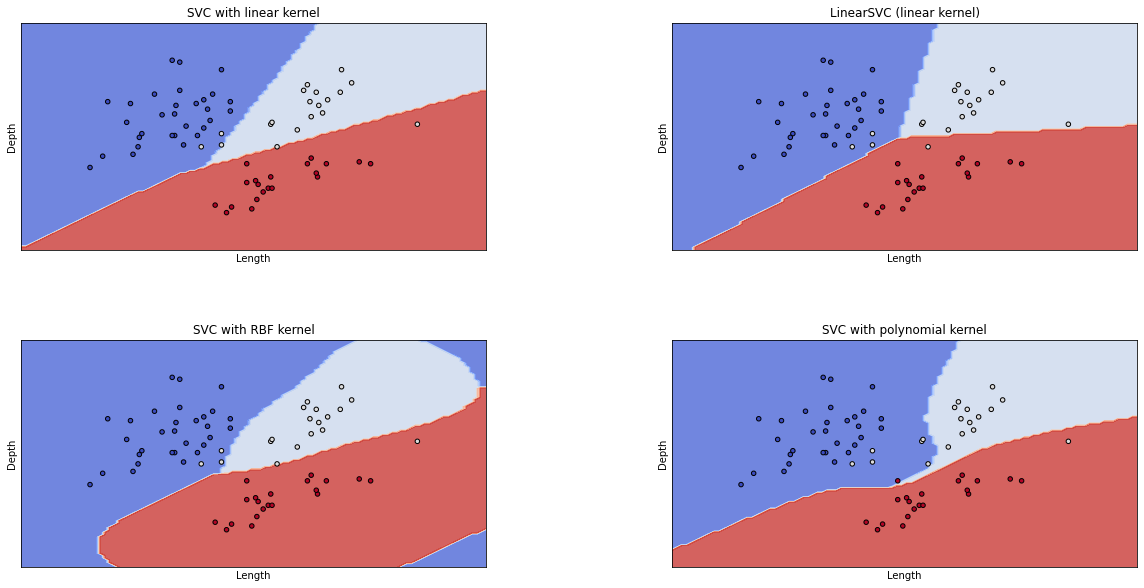

In [368]:
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(20,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_test.values[:, 0], X_test.values[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test.values,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="Length",
        ylabel="Depth",
    )
    ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [369]:
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

models = (clf.fit(X_train, y_train) for clf in models)

y_pred = []

for clf in models:
    y_pred.append(clf.predict(X_test))

for label, y_pred_i in zip(titles, y_pred):
    print(label)
    print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_i)))
    # Confusion matrix
    print('\nConfusion matrix: \n', confusion_matrix(y_test, y_pred_i))
    # Visualize the confusion matrix
    #sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_test, y_pred[0], normalize='all'), ["Adelie", "Chinstrap", "Gentoo"]).plot(cmap=plt.cm.Blues)
    #plt.grid(False)
    # The classification report, which contains accuracy, precision, recall, F1 score
    print("\n\nClassification report")
    print(classification_report(y_test, y_pred_i))
    print("\n--------------------------------------------------------------\n")

SVC with linear kernel

Accuracy: 0.9420

Confusion matrix: 
 [[30  0  0]
 [ 3 15  1]
 [ 0  0 20]]


Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.79      0.88        19
           2       0.95      1.00      0.98        20

    accuracy                           0.94        69
   macro avg       0.95      0.93      0.94        69
weighted avg       0.95      0.94      0.94        69


--------------------------------------------------------------

LinearSVC (linear kernel)

Accuracy: 0.9420

Confusion matrix: 
 [[30  0  0]
 [ 3 15  1]
 [ 0  0 20]]


Classification report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.79      0.88        19
           2       0.95      1.00      0.98        20

    accuracy                           0.94        69
   macro avg       0.95      0.93

In [370]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly','linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.982 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.927 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.909 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.855 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.909 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.909 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.455 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.455 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.436 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.436 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.436 total time=   0.0s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.964 total time=   0.0s
[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.455 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.455 total time=   0.0s
[CV 3/5] END .....C=1, gamma

[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.909 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.855 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.909 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.909 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.982 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.945 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=100, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=3)

In [371]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))
print(accuracy_score(y_test, grid_predictions))

{'C': 10, 'gamma': 1, 'kernel': 'poly'}
SVC(C=10, gamma=1, kernel='poly')
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.89      0.94        19
           2       0.95      1.00      0.98        20

    accuracy                           0.97        69
   macro avg       0.97      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69

0.9710144927536232


# K Nearest Neighboors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

### Choosing K

In [58]:
error_rate = []

# Will take some time
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_i = np.mean(pred_i != y_test)
    error_rate.append(error_i)

Minimum error:- 0.005813953488372093 at K = 5


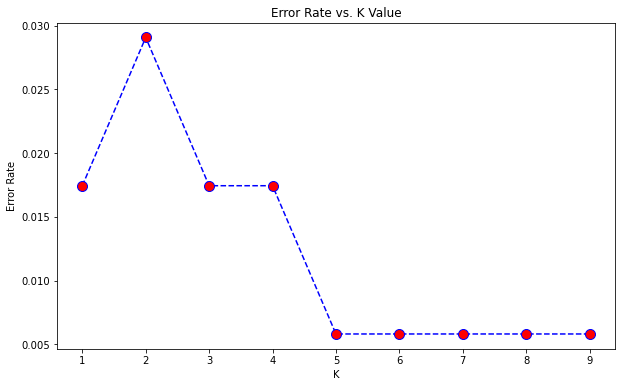

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

### Implementing right Ks

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

### KNN Predictions and Evaluations

In [61]:
confusion_matrix(y_test, pred)

array([[76,  0,  0],
       [ 1, 41,  0],
       [ 0,  0, 54]], dtype=int64)

In [62]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        42
           2       1.00      1.00      1.00        54

    accuracy                           0.99       172
   macro avg       1.00      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



In [63]:
print(f"Accuracy: {np.mean(pred == y_test):.3f}")

Accuracy: 0.994


In [64]:
accuracy_score(y_test, pred)

0.9941860465116279

# Logistic Regression

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [373]:
X_train = X_train.iloc[:, :2]
X_test = X_test.iloc[:, :2]

In [374]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(C=0.126, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=0.126, random_state=42)

In [375]:
pred = softmax_reg.predict(X_test)

In [376]:
confusion_matrix(y_test, pred)

array([[43,  0,  0],
       [ 3, 22,  2],
       [ 0,  0, 34]], dtype=int64)

In [377]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.81      0.90        27
           2       0.94      1.00      0.97        34

    accuracy                           0.95       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.95      0.95      0.95       104



In [378]:
accuracy_score(y_test, pred)

0.9519230769230769

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use t

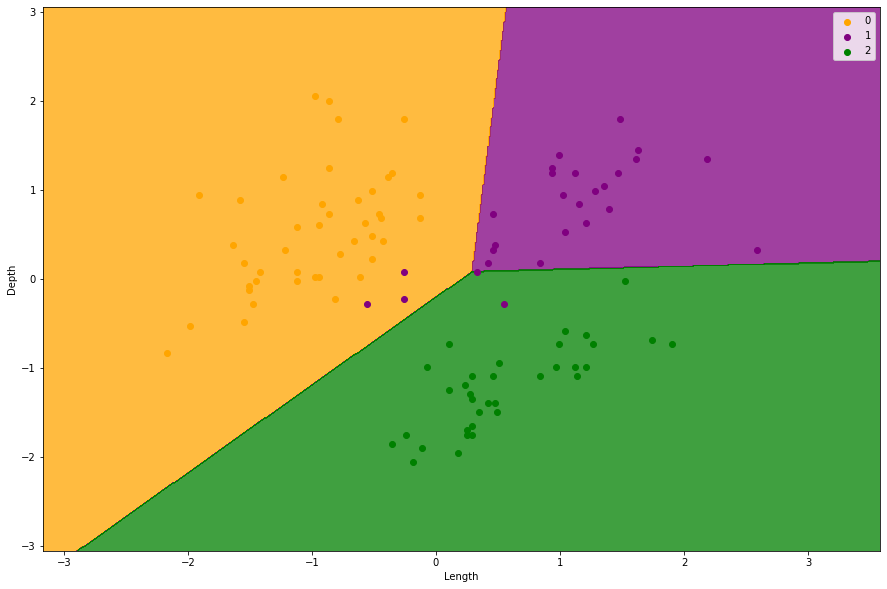

In [379]:
from matplotlib.colors import ListedColormap
X_set, y_set= X_test.values, y_test.values
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
plt.figure(figsize=(15, 10))
plt.contourf(X1,X2, softmax_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('Orange', 'Purple', 'Green')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('Orange', 'Purple', 'Green'))(i) ,label= j) 
plt.xlabel('Length')
plt.ylabel('Depth')
plt.legend()
plt.show()

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



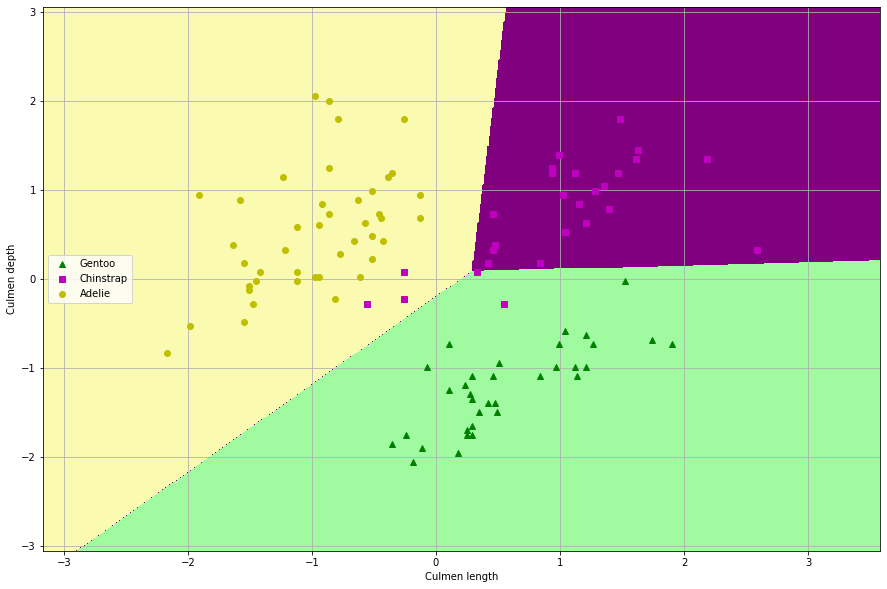

In [380]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "Purple", "#a0faa0"])

X_set, y_set= X_test.values, y_test.values
x0, x1 =  np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
#X_new = np.c_[x0.ravel(), x1.ravel()]

#y_proba = softmax_reg.predict_proba(X_new)
#y_predict = softmax_reg.predict(X_new)

#zz1 = y_proba[:, 1].reshape(x0.shape)
#zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(15, 10))
plt.plot(X_set[y_set == 2, 0], X_set[y_set == 2, 1], "g^", label="Gentoo")
plt.plot(X_set[y_set == 1, 0], X_set[y_set == 1, 1], "ms", label="Chinstrap")
plt.plot(X_set[y_set == 0, 0], X_set[y_set == 0, 1], "yo", label="Adelie")


plt.contourf(x0, x1, softmax_reg.predict(np.array([x0.ravel(), x1.ravel()]).T).reshape(X1.shape), cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap="hot")
#plt.clabel(contour, inline=1)
plt.xlabel("Culmen length")
plt.ylabel("Culmen depth")
plt.legend(loc="center left")
plt.grid()
plt.show()

## Finding the best model for Logistic Regression

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [286]:
parameters = [{"C" : np.logspace(-35, 35, 50),
                "penalty" : ['l1', 'l2']
              }]

In [288]:
clf_GS = GridSearchCV(LogisticRegression(), parameters)

In [299]:
clf_GS.fit(X_train, y_train)

C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Nur\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'penalty': ['l1', 'l2']}])

In [295]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.12648552168552957


In [296]:
lr_grid_predict = clf_GS.predict(X_test)

In [297]:
print(confusion_matrix(lr_grid_predict, y_test))

[[43  3  0]
 [ 0 24  0]
 [ 0  0 34]]


In [298]:
print(classification_report(lr_grid_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        46
           1       0.89      1.00      0.94        24
           2       1.00      1.00      1.00        34

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



# Decision Tree

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [328]:
X_train = X_train.iloc[:, :2]
X_test = X_test.iloc[:, :2]

In [329]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [330]:
from sklearn.tree import export_graphviz
export_graphviz ( 
    tree_clf , 
    out_file="L.dot", 
    feature_names=["Length","Depth"], 
    class_names=["Chinstrap", "Gentoo", "Adelie"], 
    rounded=True , 
    filled=True
)

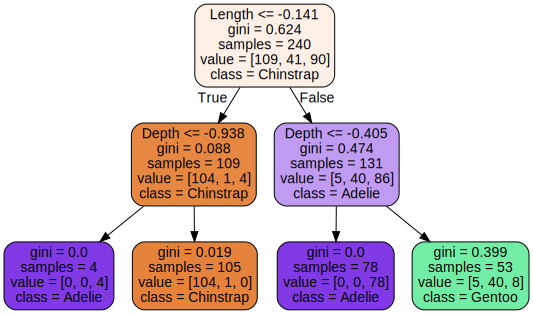

In [331]:
from graphviz import Source
Source.from_file("L.dot")

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = df.copy()
y = X.pop("species")

# Train and score baseline model
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 0.09482
